# **1. Perkenalan Dataset**


1. Perkenalan Dataset

saya menggunakan Breast Cancer Wisconsin (Diagnostic) Dataset yang berasal dari Kaggle Open Dataset.
Dataset ini merupakan dataset medis yang digunakan untuk melakukan klasifikasi apakah tumor payudara bersifat benign (jinak) atau malignant (ganas).

Sumber Dataset:
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

- radius_mean: Rata-rata jarak dari pusat ke titik-titik pada perimeter sel.
- texture_mean: Standar deviasi nilai intensitas (gray-scale) pada sel.
- perimeter_mean: Rata-rata panjang keliling sel.
- area_mean: Rata-rata luas area sel.
- smoothness_mean: Variasi lokal pada panjang radius (mengukur kelicinan permukaan sel).
- compactness_mean: Ukuran kepadatan bentuk sel berdasarkan rumus perimeter²/area − 1.
- concavity_mean: Tingkat keparahan bagian cekung pada kontur sel.
- concave points_mean: Jumlah bagian cekung (concave points) pada kontur sel.
- symmetry_mean: Menggambarkan tingkat simetri sel.
- fractal_dimension_mean: Kompleksitas kontur sel berdasarkan pendekatan fraktal.
- radius_se: Standard error untuk radius.
- texture_se: Standard error untuk tekstur.
- perimeter_se: Standard error untuk perimeter.
- area_se: Standard error untuk area.
- smoothness_se: Standard error untuk smoothness.
- compactness_se: Standard error untuk compactness.
- concavity_se: Standard error untuk concavity.
- concave points_se: Standard error untuk concave points.
- symmetry_se: Standard error untuk symmetry.
- fractal_dimension_se: Standard error untuk fractal dimension.
- radius_worst: Nilai radius terbesar dalam satu sampel.
- texture_worst: Nilai tekstur terbesar.
- perimeter_worst: Nilai perimeter terbesar.
- area_worst: Nilai area terbesar.
-	smoothness_worst: Nilai smoothness terbesar.
-	compactness_worst: Nilai compactness terbesar.
-	concavity_worst: Nilai concavity terbesar.
-	concave points_worst: Jumlah concave points terbanyak.
-	symmetry_worst: Nilai symmetry terbesar.
-	fractal_dimension_worst: Nilai fractal dimension terbesar.

**Target**
- diagnosis: Label klasifikasi (M = malignant (ganas)
B = benign (jinak))



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import os
# untuk manipulasi data
import pandas as pd
import numpy as np

# untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# untuk modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Untuk menampilkan seluruh kolom dataframe
pd.set_option("display.max_columns", None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#load dataset
df = pd.read_csv('dataset_raw/Data_Breast_Cancer_raw.csv')
# Menampilkan 5 baris awal untuk memastikan data termuat dengan benar
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [56]:
print("Shape:", df.shape)

Shape: (569, 33)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

/tmp/ipython-input-38035201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


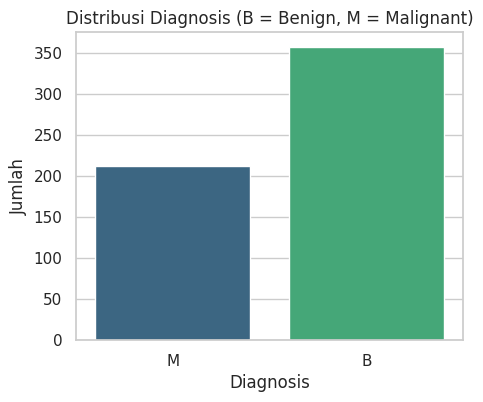

Persentase diagnosis:
 diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [58]:
# Distribusi label target
plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis', data=df, palette='viridis')

plt.title("Distribusi Diagnosis (B = Benign, M = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Jumlah")
plt.show()

# Persentase masing-masing kelas
diagnosis_pct = df['diagnosis'].value_counts(normalize=True)*100
print("Persentase diagnosis:\n", diagnosis_pct)

In [59]:
# Cek missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# menghapus kolom yang seharusnya tidak ada
df = df.drop(columns=['Unnamed: 32'])
# menghapus kolom id karna nilainya sangat besar
df = df.drop(columns=['id'])

In [ ]:
df.duplicated().sum()

0


In [ ]:
df.describe().T

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

Berdasarkan hasil deskriptif, dapat dilihat bahwa fitur-fitur yang berkaitan dengan ukuran sel seperti radius_mean, perimeter_mean, dan area_mean memiliki nilai rata-rata yang cukup besar dan rentang yang sangat lebar. Hal ini menunjukkan bahwa ukuran sel bervariasi secara signifikan antar sampel, di mana beberapa sel memiliki ukuran jauh lebih besar dibandingkan yang lain.

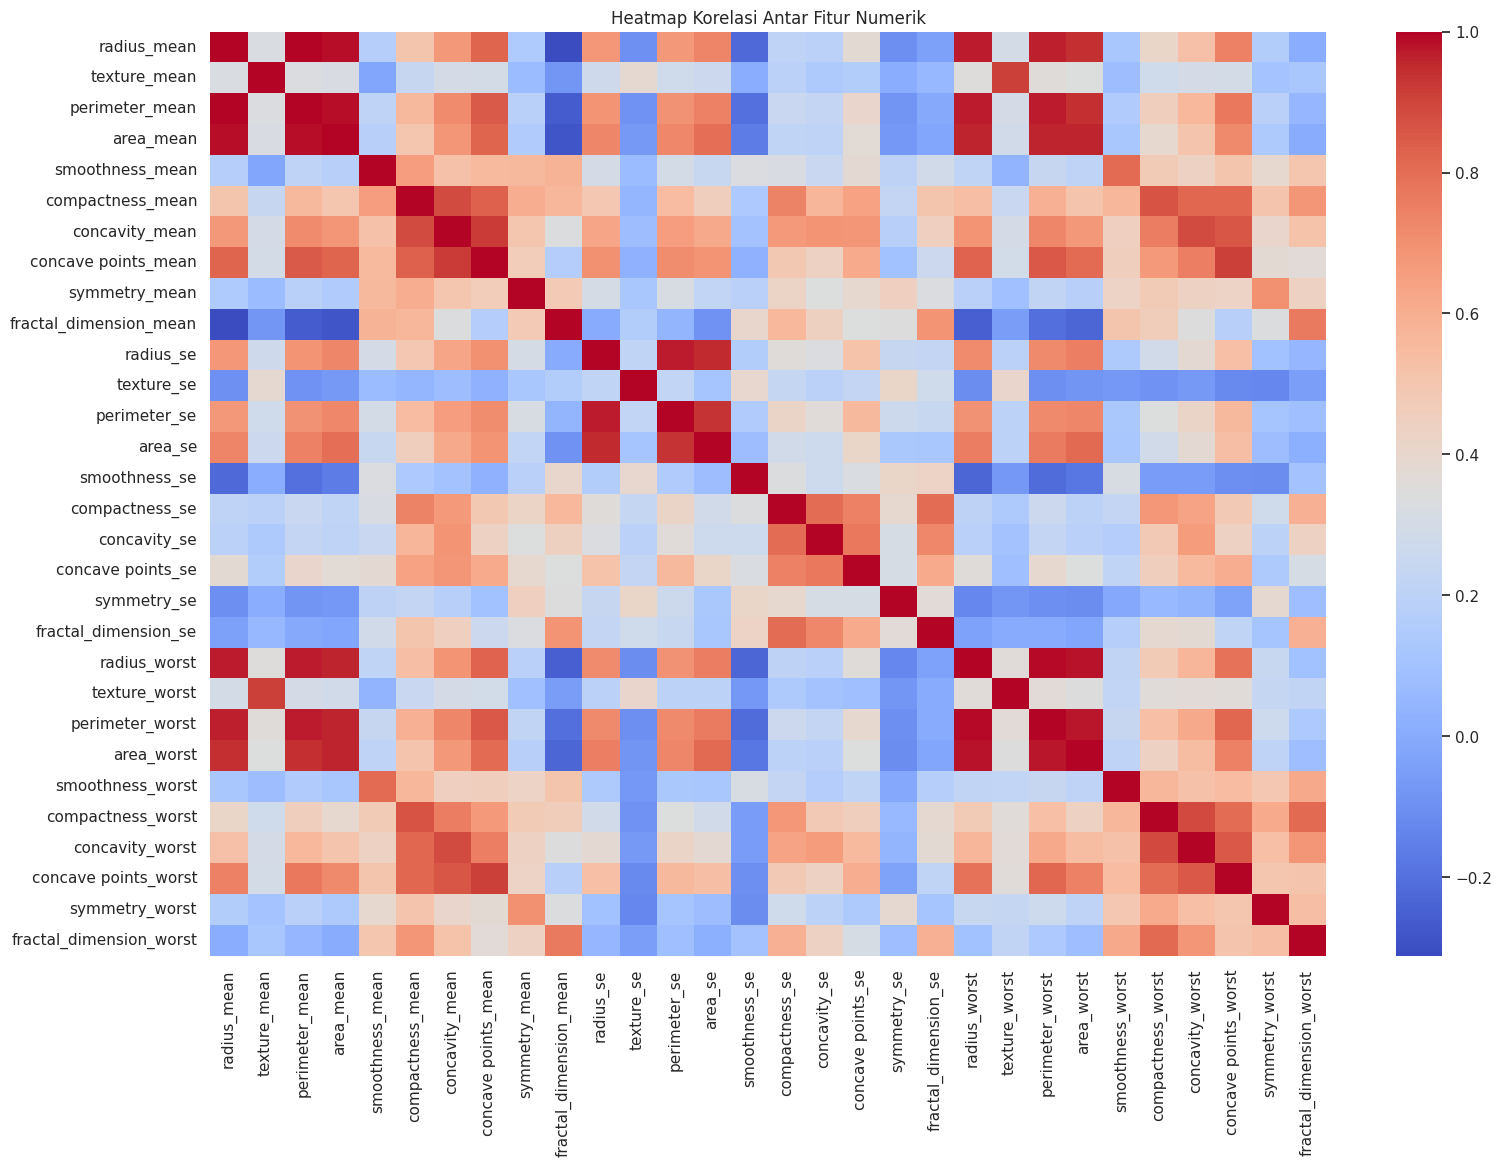

In [63]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)

plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

- radius_mean memiliki korelasi tertinggi dengan diagnosis (sekitar 0.73). semakin besar ukuran radius rata-rata sel, semakin besar kemungkinan jaringan tersebut bersifat malignant.

- area_mean juga menunjukkan korelasi yang sangat kuat dengan diagnosis (≈ 0.70). Semakin besar area sel, semakin besar kecenderungan sampel tersebut termasuk kategori ganas.

- perimeter_mean memiliki korelasi tinggi dengan diagnosis (≈ 0.72). Ukuran keliling sel yang meningkat cenderung berasosiasi dengan risiko keganasan.

- Fitur-fitur ketidakteraturan seperti concavity_mean dan concave points_mean memiliki korelasi sedang sampai tinggi dengan diagnosis. ini menunjukkan bahwa semakin tidak beraturan bentuk sel, semakin besar kemungkinan sel tersebut merupakan tumor ganas.

- Fitur-fitur “worst” seperti radius_worst, perimeter_worst, dan area_worst menunjukkan korelasi lebih kuat dibandingkan fitur mean, ini berarti bahwa nilai ekstrem sel sangat berhubungan dengan potensi keganasan.

/tmp/ipython-input-650521056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set2')


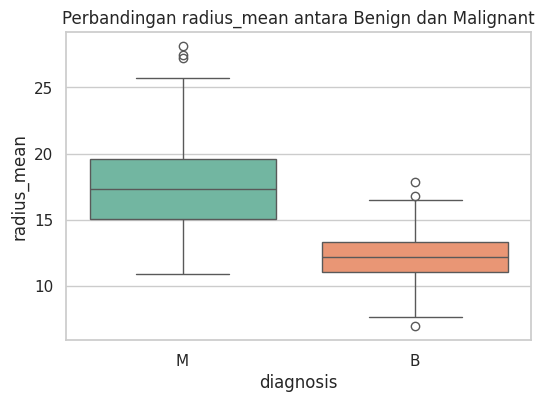

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set2')

plt.title("Perbandingan radius_mean antara Benign dan Malignant")
plt.show()

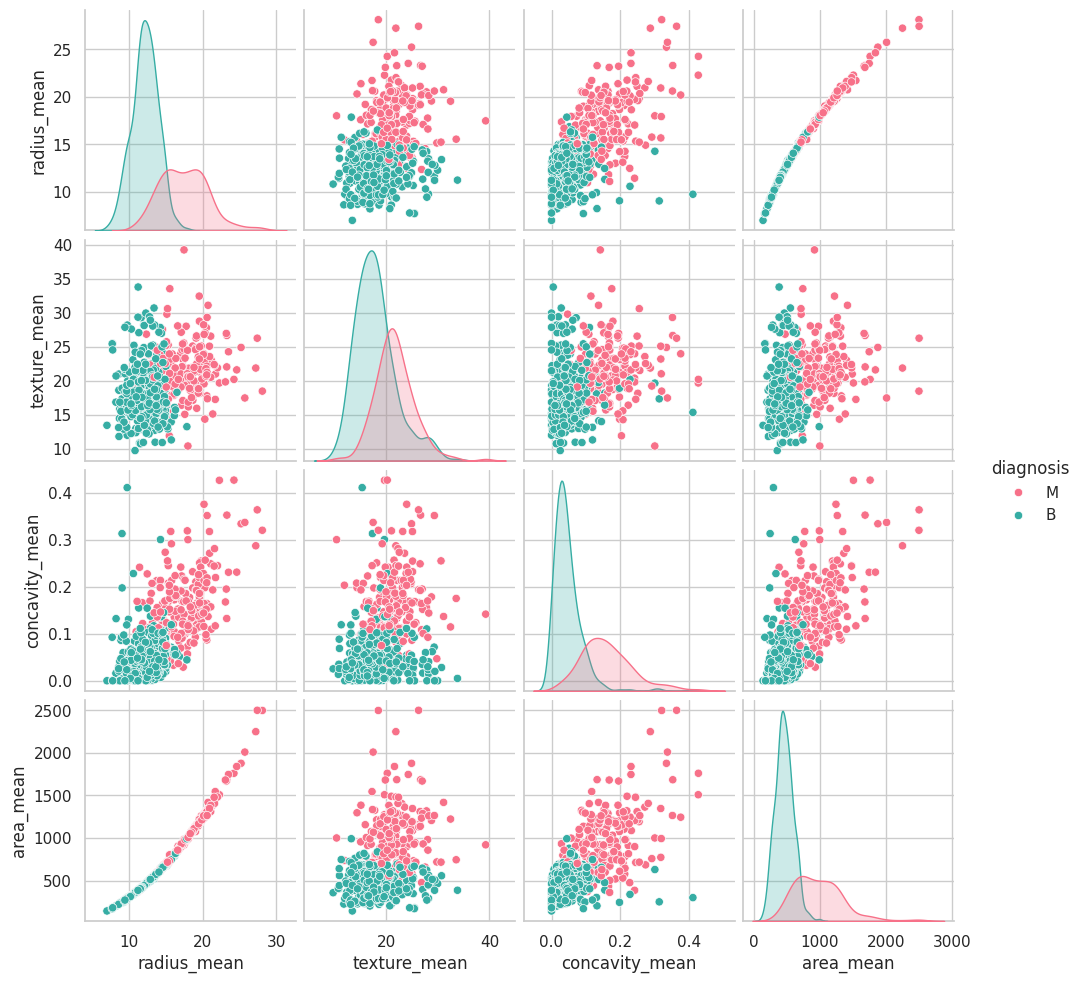

In [65]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'concavity_mean', 'area_mean', 'diagnosis']],
             hue='diagnosis', palette='husl')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing dilakukan untuk memastikan bahwa dataset berada dalam kondisi bersih sebelum digunakan dalam proses pelatihan model machine learning.

In [66]:
# Encoding diagnosis: B=0 (benign), M=1 (malignant)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
# memisahkan fitur dan target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [67]:
# Deteksi outlier menggunakan IQR (jika diperlukan untuk laporan)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum()
outliers

,0
radius_mean,14
texture_mean,7
perimeter_mean,13
area_mean,25
smoothness_mean,6
compactness_mean,16
concavity_mean,18
concave points_mean,10
symmetry_mean,15
fractal_dimension_mean,15


Dataset ini memang memiliki banyak outlier, tetapi outlier tidak dihapus, karena:

- Outlier di dataset medis menggambarkan variasi asli dari ukuran tumor

- Fitur seperti area_worst, perimeter_worst, concavity_mean memang ekstrem pada tumor ganas

- jika saya Menghapusnya, berarti menghilangkan informasi penting untuk klasifikasi kanker

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
train_data = pd.concat(
    [pd.DataFrame(X_train_scaled, columns=X.columns), y_train.reset_index(drop=True)],
    axis=1
)

test_data = pd.concat(
    [pd.DataFrame(X_test_scaled, columns=X.columns), y_test.reset_index(drop=True)],
    axis=1
)

train_data.to_csv("preprocessing/train_data.csv", index=False)
test_data.to_csv("preprocessing/test_data.csv", index=False)

**Kesimpulan**
- Dataset berisi 569 baris dan 30 fitur numerik.
- Tidak ada missing values.
- Terdapat outlier pada beberapa fitur, namun tidak dihapus.
- Target sudah di-encode.
- Data dibagi menjadi train dan test dengan rasio 80:20.
- Seluruh fitur numeric telah dilakukan scaling menggunakan StandardScaler.
- Data hasil preprocessing disimpan ke train_data.csv dan test_data.csv.